In [323]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [324]:
Calibrations =['Data_Air_to_Glass_Labday_3.txt','Data_Glass_to_Air_Labday_3.txt']

Air_to_Glass = np.loadtxt(Calibrations[0])
Glass_to_Air = np.loadtxt(Calibrations[1])

theta1_atg = Air_to_Glass[:, 0]
thetam_atg = Air_to_Glass[:, 1]

theta1_gta = Glass_to_Air[:, 0]
thetam_gta = Glass_to_Air[:, 1]

# Convert into radians
theta1_atg = theta1_atg * np.pi/180
theta1_gta = theta1_gta * np.pi/180
thetam_atg = thetam_atg * np.pi/180
thetam_gta = np.unwrap(thetam_gta,period=np.pi) * np.pi/180

theta1 = np.array([theta1_atg, theta1_gta])
thetam = np.array([thetam_atg, thetam_gta])

theta2_list = [theta1_atg - thetam_atg, theta1_gta + thetam_gta]

In [325]:
theta1_atg_err = np.full_like(np.sin(theta1[0]), abs(np.sin(0.5 * np.pi/180)))
theta2_atg_err = np.full_like(np.sin(theta2_list[0]), abs(np.sin(0.5 * np.pi/180)))
theta1_gta_err = np.full_like(np.sin(theta1[1]), abs(np.sin(0.5 * np.pi/180)))
theta2_gta_err = np.full_like(np.sin(theta2_list[1]), abs(np.sin(0.5 * np.pi/180)))

In [326]:
#Fit for the code
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

AIR TO GLASS LAB DAY 3

The index of refraction for the glass is 1.4542 plusminus 0.0134


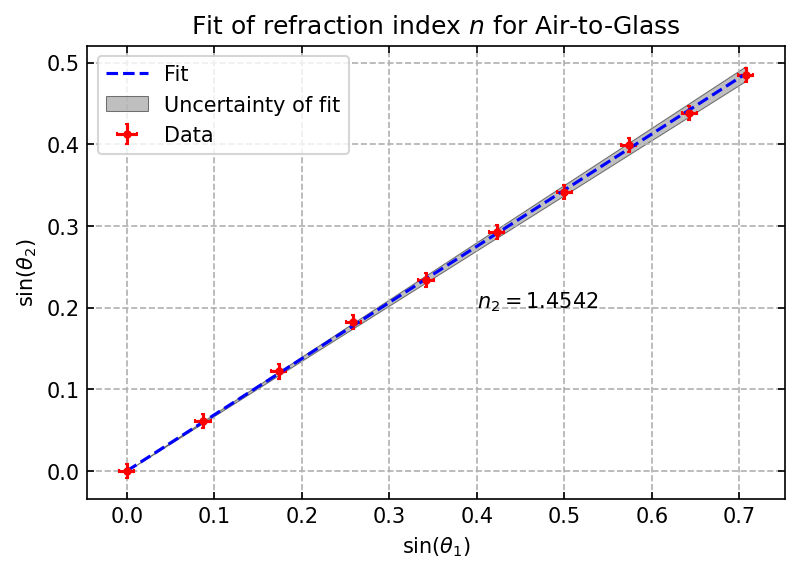

In [327]:
p_opt_atg, p_cov_atg = sp.curve_fit(n_fit, np.sin(theta1[0]), np.sin(theta2_list[0]), sigma = theta1_atg_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[0]), np.sin(theta2_list[0]), xerr = theta1_atg_err, yerr = theta2_atg_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0] - 2 * np.sqrt(p_cov_atg[0][0])), n_fit(np.sin(theta1[0]), p_opt_atg[0] + 2 * np.sqrt(p_cov_atg[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Air-to-Glass')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.4, 0.2, f'$n_2 = {round(p_opt_atg[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_atg[0], 4), round(np.sqrt(p_cov_atg[0][0]), 4)))
n_2_atg = p_opt_atg
plt.show()

GLASS TO AIR LAB DAY 3

The index of refraction for the glass is 0.9785 plusminus 0.0061


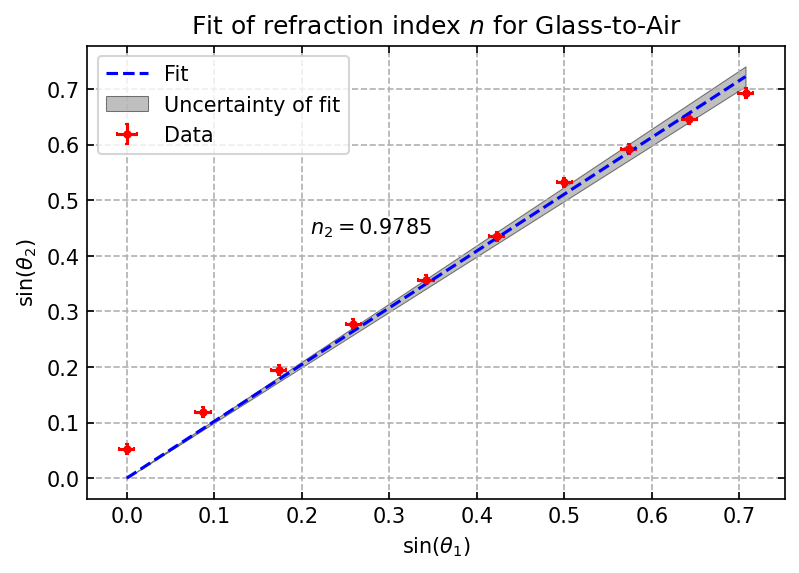

In [328]:
p_opt_gta, p_cov_gta = sp.curve_fit(n_fit, np.sin(theta1[1]), np.sin(theta2_list[1]), sigma = theta1_gta_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[1]), np.sin(theta2_list[1]), xerr = theta1_gta_err, yerr = theta2_gta_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0] - 4*np.sqrt(p_cov_gta[0][0])), n_fit(np.sin(theta1[1]), p_opt_gta[0] + 4* np.sqrt(p_cov_gta[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Glass-to-Air')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt_gta[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_gta[0], 4), round(np.sqrt(p_cov_gta[0][0]), 4)))
n_2_gta = p_opt_gta
plt.show()




COMPARING R+T01

In [329]:
#Get data
S_pol_L3 = np.loadtxt('S_pol_AtG_Labday_3.txt')
P_pol_L3 = np.loadtxt('P_pol_AtG_Labday_3.txt')

#Intensity of laser


E_0_S = (3.6-0.1)/(0.94**2)
E_0_P = (1.8-0.1)/(0.94**2)

#Intensity of transmitted and reflected light
E_1_S = S_pol_L3[:, 5]
E_2_S = S_pol_L3[:, 2]

E_1_P = P_pol_L3[:, 5]
E_2_P = P_pol_L3[:, 2]

In [330]:
#Getting the small r value
r_s = E_1_S/E_0_S

r_p =E_1_P/E_0_P
r_p, r_s

(array([ 0.        ,  0.        ,  0.00519765,  0.00623718,  0.00415812,
         0.00259882,  0.00259882,  0.00051976,  0.        , -0.00519765,
        -0.01039529, -0.01559294, -0.01247435, -0.00779647,  0.00519765,
         0.02338941,  0.05717412,  0.11954588]),
 array([0.        , 0.        , 0.03029486, 0.04796686, 0.03913086,
        0.03786857, 0.05806514, 0.04291771, 0.06816343, 0.070688  ,
        0.11865486, 0.13885143, 0.194392  , 0.27770286, 0.32819429,
        0.50491429, 0.73212571, 0.90884571]))

In [331]:
#Getting the small t value
t_s = E_2_S/E_0_S

t_p = E_2_P/E_0_P
t_p, t_s

(array([0.22349882, 0.23389412, 0.24948706, 0.23909176, 0.22869647,
        0.20790588, 0.20790588, 0.20270824, 0.18711529, 0.17672   ,
        0.15592941, 0.15073176, 0.11954588, 0.09875529, 0.07276706,
        0.05197647, 0.02338941, 0.        ]),
 array([0.95933714, 1.03507429, 1.06032   , 1.00982857, 0.95933714,
        0.90884571, 0.83310857, 0.83310857, 0.78261714, 0.73212571,
        0.60589714, 0.60589714, 0.45442286, 0.35344   , 0.27012914,
        0.18176914, 0.07699943, 0.01009829]))

In [332]:
#Large R value:
R_s = r_s**2

R_p= r_p**2
R_p, R_s

(array([0.00000000e+00, 0.00000000e+00, 2.70155349e-05, 3.89023703e-05,
        1.72899424e-05, 6.75388374e-06, 6.75388374e-06, 2.70155349e-07,
        0.00000000e+00, 2.70155349e-05, 1.08062140e-04, 2.43139815e-04,
        1.55609481e-04, 6.07849536e-05, 2.70155349e-05, 5.47064583e-04,
        3.26887973e-03, 1.42912180e-02]),
 array([0.        , 0.        , 0.00091778, 0.00230082, 0.00153122,
        0.00143403, 0.00337156, 0.00184193, 0.00464625, 0.00499679,
        0.01407898, 0.01927972, 0.03778825, 0.07711888, 0.10771149,
        0.25493844, 0.53600806, 0.82600053]))

In [333]:
#Import the angles measured:
theta1_s = S_pol_L3[:, 0]
thetam_reflect_s = 360 - S_pol_L3[:, 4]
thetam_trans_s = S_pol_L3[:, 1]

theta1_p = P_pol_L3[:, 0]
thetam_reflect_p = 360 - P_pol_L3[:, 4]
thetam_trans_p = P_pol_L3[:, 1]

#convert to radians:
theta1_s = theta1_s * np.pi/180
#thetam_reflect_s = thetam_reflect_s * np.pi/180
thetam_trans_s = thetam_trans_s * np.pi/180
thetam_reflect_s = np.unwrap(thetam_reflect_s,period=np.pi) * np.pi/180
#thetam_trans_s = np.unwrap(thetam_trans_s, period=np.pi) *np.pi/180

theta1_p = theta1_p * np.pi/180
#thetam_reflect_p = thetam_reflect_p * np.pi/180
thetam_trans_p = thetam_trans_p *np.pi/180
thetam_reflect_p = np.unwrap(thetam_reflect_p,period=np.pi) * np.pi/180
#thetam_trans_p = np.unwrap(thetam_trans_p, period=np.pi) *np.pi/180

# Calculate real angle
theta2_reflect_s = theta1_s - thetam_reflect_s
theta2_trans_s = theta1_s - thetam_trans_s

theta2_reflect_p = theta1_p - thetam_reflect_p
theta2_trans_p = theta1_p - thetam_trans_p

# Uncertainties
Volt_err = S_pol_L3[:, 3] + 0.1

In [334]:
#Large T value:

T_s = (np.cos(theta2_trans_s)) / (np.cos(theta1_s)) * n_2_atg/n_2_gta * t_s**2

T_p = (np.cos(theta2_trans_p)) / (np.cos(theta1_p)) * n_2_atg/n_2_gta * t_p**2

T_s


array([1.36781320e+00, 1.59540990e+00, 1.68405949e+00, 1.54277263e+00,
       1.41235897e+00, 1.29534426e+00, 1.11929010e+00, 1.15917509e+00,
       1.07254931e+00, 9.85348478e-01, 7.27579041e-01, 7.93226784e-01,
       4.99712988e-01, 3.48525103e-01, 2.46421197e-01, 1.45339053e-01,
       3.88725484e-02, 1.37030019e-03])

In [335]:
#Check if R+T holds:
total_s = r_s + t_s

total_p = r_p + t_p
total_p, r_p, t_p

(array([0.22349882, 0.23389412, 0.25468471, 0.24532894, 0.23285459,
        0.21050471, 0.21050471, 0.203228  , 0.18711529, 0.17152235,
        0.14553412, 0.13513882, 0.10707153, 0.09095882, 0.07796471,
        0.07536588, 0.08056353, 0.11954588]),
 array([ 0.        ,  0.        ,  0.00519765,  0.00623718,  0.00415812,
         0.00259882,  0.00259882,  0.00051976,  0.        , -0.00519765,
        -0.01039529, -0.01559294, -0.01247435, -0.00779647,  0.00519765,
         0.02338941,  0.05717412,  0.11954588]),
 array([0.22349882, 0.23389412, 0.24948706, 0.23909176, 0.22869647,
        0.20790588, 0.20790588, 0.20270824, 0.18711529, 0.17672   ,
        0.15592941, 0.15073176, 0.11954588, 0.09875529, 0.07276706,
        0.05197647, 0.02338941, 0.        ]))

In [336]:
# Calculating the error of T + R + d = 1


In [337]:
#Difference from 1
D_s = 1 - r_s - t_s

# Calculated the mean
mean_D_s = np.mean(D_s)

D_p = 1 - r_p - t_p
mean_D_p = np.mean(D_p)
print(f'The mean of the error for S-Polarization is {round(mean_D_s, 3)} and the one for P-Polarization is {round(mean_D_p, 3)}')


The mean of the error for S-Polarization is 0.152 and the one for P-Polarization is 0.833


In [338]:
#Brewster angle
Brewster = np.arctan(n_2_atg/n_2_gta)
#Critical angle for internal reflection
Critical = np.arcsin(1/n_2_atg)

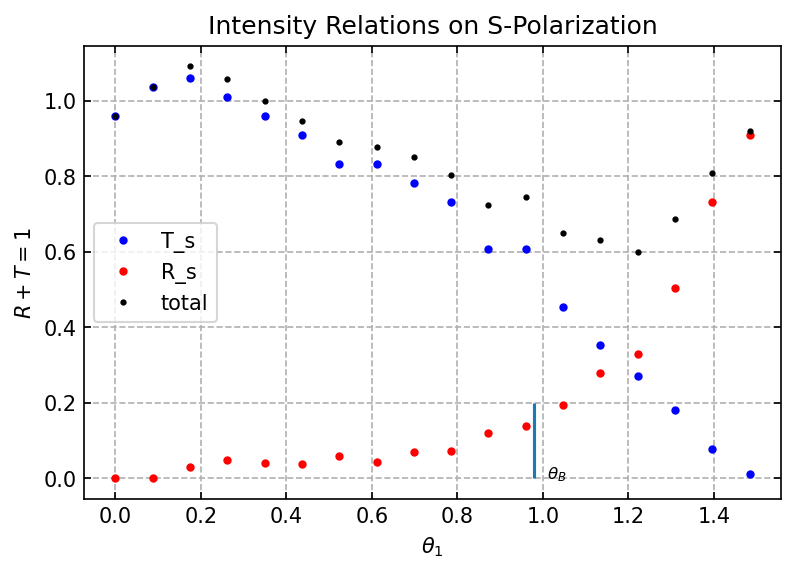

In [339]:
fig, ax = plt.subplots()

ax.plot(theta1_s, t_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, r_s, '.', color= 'red',label = 'R_s')  # Plotting Reflected Light
ax.plot(theta1_s, total_s, '.', markersize = 4, color = 'black', label = 'total') #Plotting total light measured
ax.vlines(x = Brewster, ymin=0, ymax=0.20)
# ax.vlines(x = Critical, ymin=0, ymax=20)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on S-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

Text(1.01, 0.0, '$\\theta_{B}$')

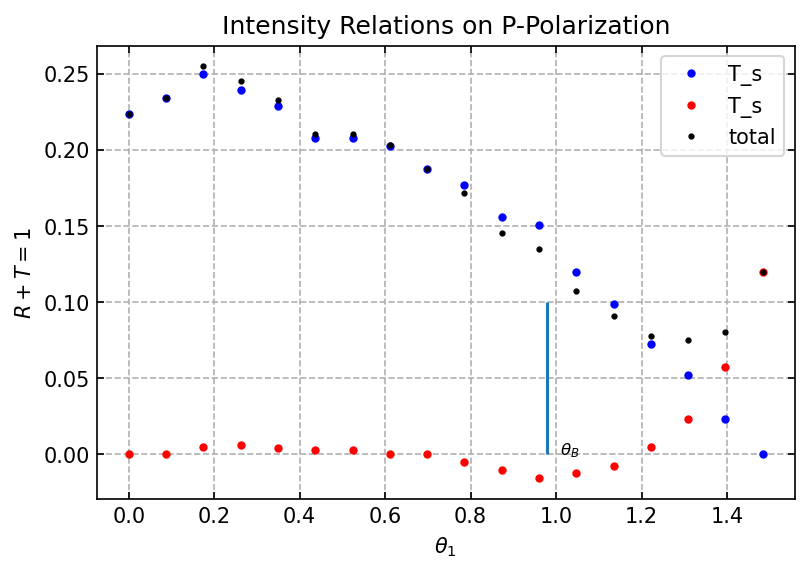

In [340]:
fig, ax = plt.subplots()

ax.plot(theta1_p, t_p, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_p, r_p, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on P-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)

INTENSITY PLOTS AIR TO GLASS

In [341]:
# Defining all the functions for the intensity
def reflected_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

/tmp/ipykernel_826/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
/tmp/ipykernel_826/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


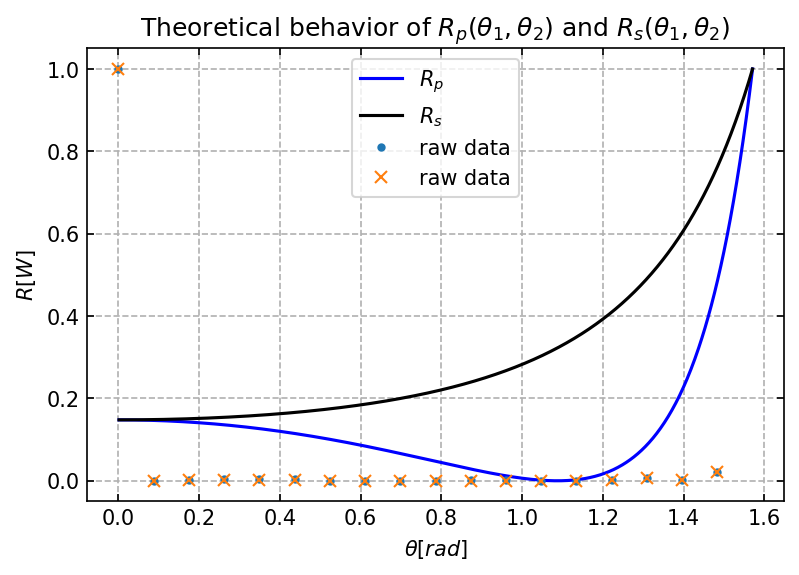

In [342]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 90, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 50, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 - theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')
plt.plot(theta1_s, reflected_s(theta1_s, theta2_reflect_s), '.', label = 'raw data')
plt.plot(theta1_p, reflected_p(theta1_p, theta2_reflect_p), 'x', label = 'raw data')


# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

/tmp/ipykernel_826/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_826/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_826/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_826/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))


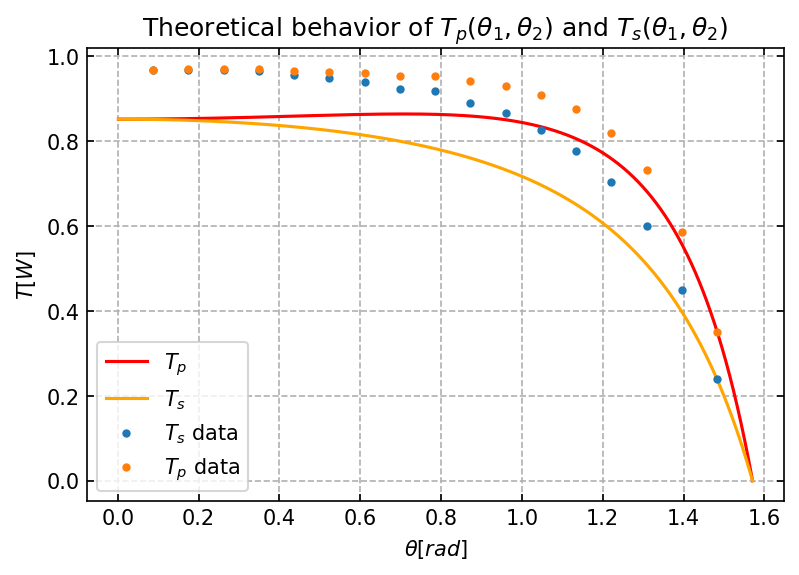

In [343]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'red', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'orange', label = r'$T_s$')
plt.plot(theta1_s, transmitted_s(theta1_s, theta2_trans_s), '.', label = "$T_s$ data")
plt.plot(theta1_p, transmitted_p(theta1_p, theta2_trans_p), '.', label = "$T_p$ data")
# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

## FINAL PLOTS

/tmp/ipykernel_826/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_826/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


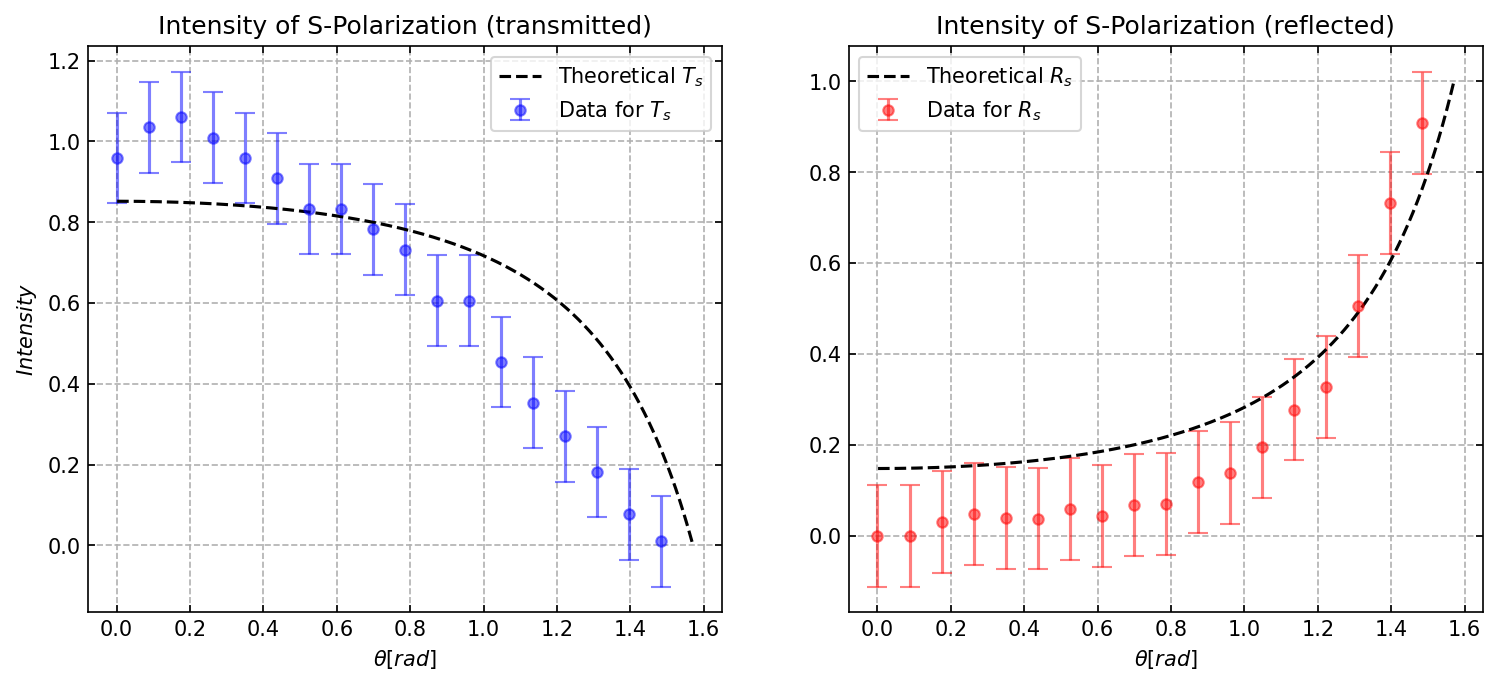

In [344]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_s, t_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_s$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $T_s$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
#ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of S-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_s, r_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_s$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $R_s$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of S-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')

/tmp/ipykernel_826/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_826/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2


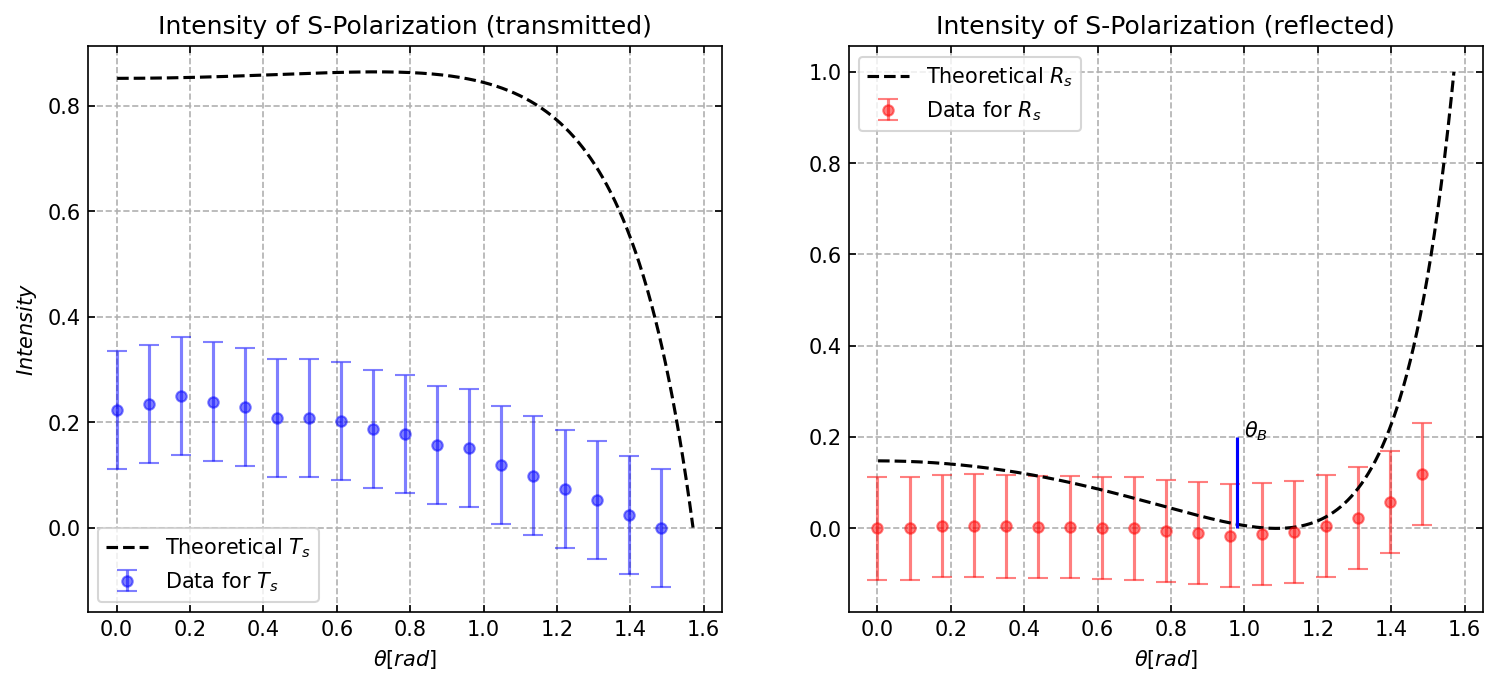

In [345]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_p, t_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_s$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $T_s$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of S-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_p, r_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_s$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $R_s$')
ax2.vlines(x = Brewster, ymin=0, ymax=0.2, linestyle = '-', color = 'blue')
ax2.text(1.0, 0.2, r'$\theta_B$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of S-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')